In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from functions_scores import *

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100,
                       centers=4,
                       cluster_std=0.50,
                       random_state=0)

dataname = 'synthetic'
Scaler = MinMaxScaler().fit(X)
X_sc = Scaler.transform(X)
pt_cloud = X_sc

In [2]:
# rc = gd.RipsComplex(pt_cloud, max_edge_length = maxDist(pt_cloud)/2)
# st = rc.create_simplex_tree(max_dimension = 2)
# L = st.get_filtration()
# my_data =[list(simplex) for simplex in L]

In [3]:
# Sage için gerekli bilgiler
print("Maksimum epsilon değeri:", np.round(maxDist(pt_cloud)/2,2))
print("Matris Boyutları:", pt_cloud.shape[0])

Maksimum epsilon değeri: 0.65
Matris Boyutları: 100


In [4]:
# with open("Complexes_Data/synthetic_complexes.txt", "w") as file:
#     file.write(json.dumps(my_data))
# file.close()

# After Sage

In [5]:
Methods = ['single',  'average', 'complete', 'ward']
Metrics = ['braycurtis', 'cosine', 'euclidean','cityblock']
n_cluster  = len(np.unique(y))

## Homological and Minkowski Distance with p = 1/2

In [6]:
hom_distance = All2One("Matrix_Data/"+ dataname + "_result/*.npy")
minkowski = squareform(pdist(pt_cloud, minkowski_distance))

## Unsupervised Scores

In [7]:
Scores_list = [homogeneity_score, v_measure_score, adjusted_rand_score,
               adjusted_mutual_info_score, fowlkes_mallows_score, completeness_score, mutual_info_score, rand_score]
Scores_Cluster = {}
temp = []
for score in Scores_list:
    Scores_Cluster[score.__name__]= Unsupervised_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster,y,score)
    temp.append(Scores_Cluster[score.__name__])
    
Unsupervised_Scores = pd.concat(temp, axis=1)
Unsupervised_Scores.T

,braycurtis,cosine,euclidean,cityblock,minkowski,homological
homogeneity_score,1.0,0.720591,1.0,1.0,1.0,0.948572
method,average,complete,average,single,complete,average
v_measure_score,1.0,0.731404,1.0,1.0,1.0,0.949121
method,average,average,average,single,complete,average
adjusted_rand_score,1.0,0.671898,1.0,1.0,1.0,0.94726
method,average,average,average,single,complete,average
adjusted_mutual_info_score,1.0,0.721661,1.0,1.0,1.0,0.947328
method,average,average,average,single,complete,average
fowlkes_mallows_score,1.0,0.756127,1.0,1.0,1.0,0.960068
method,average,average,average,single,complete,average


In [8]:
Unsupervised_Scores.T.to_csv('Scores/'+ dataname +'/unsupervised.csv')

## Supervised Scores

In [9]:
Score_list = ['accuracy', 'f1', 'false_discovery_rate', 'false_negative_rate',
       'false_positive_rate', 'negative_predictive_value',
       'positive_predictive_value', 'precision', 'recall', 'sensitivity',
       'specificity', 'true_negative_rate', 'true_positive_rate']

Scores_Class= {}
Scores_Class_hungarian = {}
Scores_Class_pair = {}
Scores_Class_myoptim ={}
temp = []
for score in Score_list:
    Scores_Class_hungarian[score] = Supervised_Scores_hungarian(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster,y,score)
    temp.extend([Scores_Class_hungarian[score]])
Supervised_Scores = pd.concat(temp, axis =1)
Supervised_Scores.T

,braycurtis,cosine,euclidean,cityblock,minkowski,homological
hungarian_max_accuracy,1.0,0.915,1.0,1.0,1.0,0.99
method,average,average,average,single,complete,average
hungarian_max_f1,1.0,0.83,1.0,1.0,1.0,0.98
method,average,average,average,single,complete,average
hungarian_max_false_discovery_rate,0.49,0.27,0.26,0.01,0.24,0.75
method,single,single,single,complete,single,complete
hungarian_max_false_negative_rate,0.49,0.27,0.26,0.01,0.24,0.75
method,single,single,single,complete,single,complete
hungarian_max_false_positive_rate,0.163333,0.09,0.086667,0.003333,0.08,0.25
method,single,single,single,complete,single,complete


In [10]:
Supervised_Scores.T.to_csv('Scores/'+ dataname +'/supervised.csv')

# Silhouette Scores

In [11]:
Unsup_Silhoutte = Sil_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster, silhouette_score)
Unsup_Silhoutte

,silhouette_score,method
braycurtis,0.686839,average
cosine,0.419127,average
euclidean,0.686839,average
cityblock,0.686839,single
minkowski,0.674029,single
homological,0.835104,ward


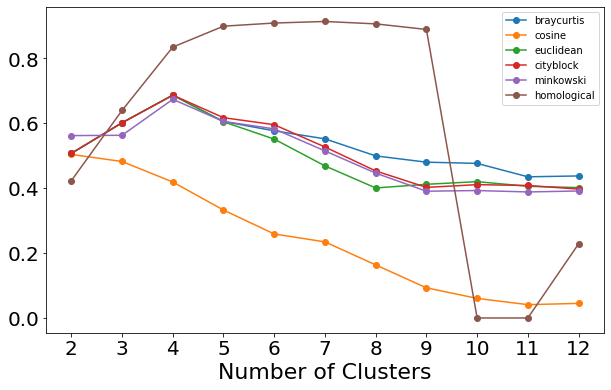

In [12]:
sil_score_plot_1(Methods, Metrics,pt_cloud, minkowski, hom_distance, np.arange(2,13), silhouette_score, dataname)

In [13]:
Unsup_Silhoutte.to_csv('Scores/'+ dataname +'/silhouette.csv')

In [14]:
Entropy(Methods, Metrics, pt_cloud, minkowski, hom_distance, n_cluster)

,single,average,complete,ward
braycurtis,0.668416,1.386294,1.386294,1.386294
cosine,1.128102,1.336197,1.351795,1.351795
euclidean,1.081707,1.386294,1.386294,1.386294
cityblock,1.386294,1.386294,1.385894,1.386294
minkowski,1.386294,1.386294,1.385894,1.386294
homological,1.386294,1.386294,1.385894,1.386294
